# 9강. 우리 기업의 VIP고객들은 어떤 게임플레이를 하고 있을까?

## 1. 데이터 연결하기

In [1]:
!mkdir -p ~/aiffel/data_analysis_basic/data
!ln -s ~/data/* ~/aiffel/data_analysis_basic/data

ln: failed to create symbolic link '/aiffel/aiffel/data_analysis_basic/data/customer_for_cluster.csv': File exists


## 2. 데이터분석

In [2]:
# Pandas, Numpy, Matplotlib, Seaborn을 호출
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

# customer_data 변수를 만들고 customer_for_cluster.csv 파일의 데이터를 할당
customer_data = pd.read_csv('~/aiffel/data_analysis_basic/data/customer_for_cluster.csv')

# customer_data의 head 값 확인하기
customer_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434


In [3]:
# customer_data의 정보 확인하기
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Install      18506 non-null  object 
 1   Time_stamp   18506 non-null  object 
 2   Status       18506 non-null  object 
 3   ID           18506 non-null  object 
 4   Payment      18506 non-null  int64  
 5   Game_Name    18506 non-null  object 
 6   Level_score  18506 non-null  float64
 7   Time_score   18506 non-null  float64
 8   PK           18506 non-null  float64
 9   BOSS         18506 non-null  float64
 10  Gacha        18506 non-null  float64
 11  Attack       18506 non-null  float64
 12  Mining       18506 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


- 총 18,506건의 데이터
- Level_score(레벨점수: 플레이어들이 획득한 게임 내 레벨 점수)
- Time_score(시간점수: 플레이어들이 플레이한 게임 내 시간 점수)
- PK(플레이어킬: 게임 안에서 PK한 횟수를 수치화)
- BOSS(보스플레이: 게임 안에서 BOSS를 잡은 횟수를 수치화)
- Gacha(가챠플레이: 게임 안에서 아이템을 구매한 횟수를 수치화)
- Attack(어택포인트: 게임 안에서 몬스터를 사냥한 횟수를 수치화)
- Mining(마이닝포인트: 게임 안에서 채집, 수집 등 자원채취 횟수를 수치화)

### 군집 분석

In [4]:
# sklearn라이브러리 중 필요한 모듈을 호출
from sklearn.cluster import KMeans
from sklearn import preprocessing

# customer_data 중 Level_score와 Time_score를 골라내 temp_var로 저장
temp_var = customer_data[['Level_score','Time_score']]
temp_var

,Level_score,Time_score
0,83.156420,71.314875
1,85.171839,73.128354
2,82.928130,70.780184
3,83.700084,77.175798
4,86.330819,76.646228
...,...,...
18501,28.755368,63.765649
18502,27.767066,58.762254
18503,30.275532,37.941294
18504,28.758063,65.117374


In [5]:
# sklearn의 preprocessing을 이용해 temp_var의 각 값들을 정규화
temp_var = preprocessing.StandardScaler().fit(temp_var).transform(temp_var)
# 사이킷런의 preprocessing모듈을 이용해 temp_var의 각 값들을 정규화
# StandardScaler() : 할당받은 값의 스케일을 조정하는 함수
# fit() : 데이터셋의 평균과 표준편차를 계산하는 함수
# transform() : 데이터셋의 평균과 표준편차를 각각 0과 1로 전환하는 함수(표준정규분포로 변환)

In [7]:
# 군집분석을 하기 위해 Kmeans 변수를 만들고 군집분석 초기 모델을 할당
Kmeans = KMeans(n_clusters=5, # 군집 개수는 5개
               init='k-means++', # 모델 초기화 방법은 K-means++ 사용
               n_init=10, # 모델의 초기화 횟수(초기화-학습 10회 반복 후 최선의 결과 선택)
               verbose=True, # 군집분석 수행 중 각 단계별 메세지 출력 여부
               max_iter=100, # 최대 반복 횟수 = 100
               random_state=1111) # 랜덤시드 고정

# 할당된 군집분석 모델에 temp_var를 적용
Kmeans.fit(temp_var)

Initialization complete
Iteration 0, inertia 2497.8632079961108
Iteration 1, inertia 2200.883438081366
Iteration 2, inertia 2092.338616177069
Iteration 3, inertia 2007.5957692174911
Iteration 4, inertia 1945.6131933510846
Iteration 5, inertia 1906.2578810272917
Iteration 6, inertia 1885.3067588011133
Iteration 7, inertia 1873.7510076411158
Iteration 8, inertia 1866.9684670908505
Iteration 9, inertia 1863.0984968737648
Iteration 10, inertia 1861.1510878670192
Iteration 11, inertia 1860.2433556391384
Converged at iteration 11: center shift 4.568322224962504e-05 within tolerance 0.00010000000000000034.
Initialization complete
Iteration 0, inertia 2652.9598170024774
Iteration 1, inertia 1997.143046755115
Iteration 2, inertia 1915.4711878357073
Iteration 3, inertia 1886.96431328181
Iteration 4, inertia 1873.6864541358068
Iteration 5, inertia 1866.7431300342519
Iteration 6, inertia 1862.9879945727562
Iteration 7, inertia 1861.1011652223392
Iteration 8, inertia 1860.2255695759477
Converged at

KMeans(max_iter=100, n_clusters=5, random_state=1111, verbose=True)

[verbose](https://www.inflearn.com/questions/208344)

In [10]:
# 분류된 각 군집이름(label)을 변수 Cluster_label로 할당
cluster_label = Kmeans.labels_

# 할당된 Cluster_label을 customer_data의 Cluster열 값으로 할당
customer_data['Cluster'] = pd.DataFrame(cluster_label)
customer_data

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining,Cluster
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489,1
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619,1
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637,1
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521,1
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,2022-05-09,2022-05-10,play,Danielle_910,0,Mine Ground,28.755368,63.765649,30.427502,58.852150,56.549457,24.272387,46.070132,3
18502,2022-04-04,2022-04-23,play,Marilyn_968,0,Mine Ground,27.767066,58.762254,54.093863,69.246963,65.541975,41.359648,36.397338,3
18503,2022-01-15,2022-01-16,play,Monique_818,0,Mine Ground,30.275532,37.941294,12.596498,46.007774,64.563203,31.749220,37.573881,2
18504,2022-01-29,2022-02-03,play,Mark_684,0,Mine Ground,28.758063,65.117374,51.919927,63.716950,58.105054,40.035940,41.720459,3


In [11]:
# customer_data의 Cluster열의 각 고유값 계산하기
customer_data['Cluster'].value_counts()

0    3915
1    3701
2    3698
4    3687
3    3505
Name: Cluster, dtype: int64

In [12]:
# RFM_data의 Class를 기준으로 Recency, Frequency, Monetary의 평균값 집계
temp_var = customer_data.groupby('Cluster').agg({'Time_score':'mean', 'Level_score':'mean', 'Payment':'mean'}).round(1)
temp_var

,Time_score,Level_score,Payment
Cluster,,,
0,54.3,27.7,932.1
1,73.6,85.7,1019.3
2,40.2,27.4,990.0
3,62.6,31.3,1019.7
4,47.8,14.6,861.0


In [13]:
temp_var.T

Cluster,0,1,2,3,4
Time_score,54.3,73.6,40.2,62.6,47.8
Level_score,27.7,85.7,27.4,31.3,14.6
Payment,932.1,1019.3,990.0,1019.7,861.0


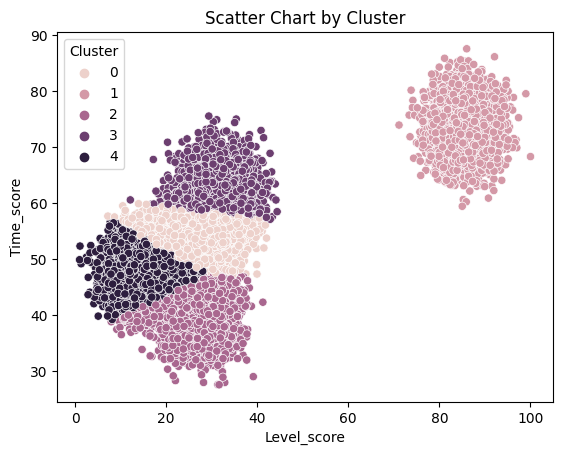

In [15]:
# 각 군집별 Level_score와 Time_score를 산포도로 시각화
ax = sns.scatterplot(data=customer_data, x='Level_score', y='Time_score', hue='Cluster')
plt.title('Scatter Chart by Cluster')
plt.show()

In [16]:
# 시각화를 위해 temp_var의 결과값을 전처리하기
temp_var.index = temp_var.index.tolist()
temp_var = temp_var.reset_index()
temp_var = temp_var.rename(columns = {'index':'Cluster'})
temp_var

,Cluster,Time_score,Level_score,Payment
0,0,54.3,27.7,932.1
1,1,73.6,85.7,1019.3
2,2,40.2,27.4,990.0
3,3,62.6,31.3,1019.7
4,4,47.8,14.6,861.0


<function matplotlib.pyplot.show(close=None, block=None)>

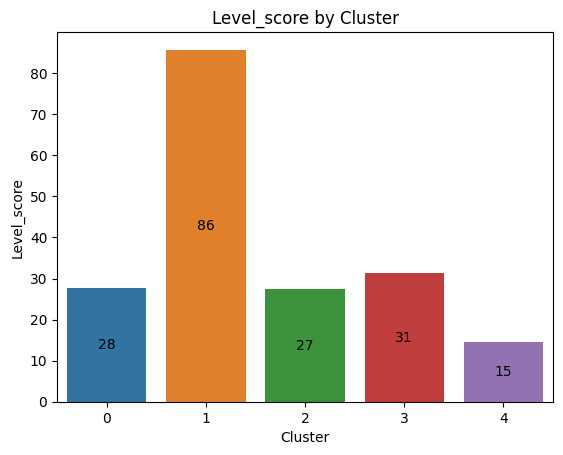

In [17]:
# 각 Cluster별 평균 Level_score를 시각화하기
ax = sns.barplot(data=temp_var, x='Cluster', y='Level_score')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Level_score by Cluster')
plt.show

[f''](https://www.daleseo.com/python-f-strings/) : f-string을 사용하여 문자열 안에서 함수를 호툴한 결과를 삽입할 수 있다.  
[{x:,.0f}](http://programarcadegames.com/index.php?chapter=formatting&lang=en) : 쉼표 구분 기호가 있는 숫자 형식 + 소수점 이하 자릿수 없음(반올림)

<function matplotlib.pyplot.show(close=None, block=None)>

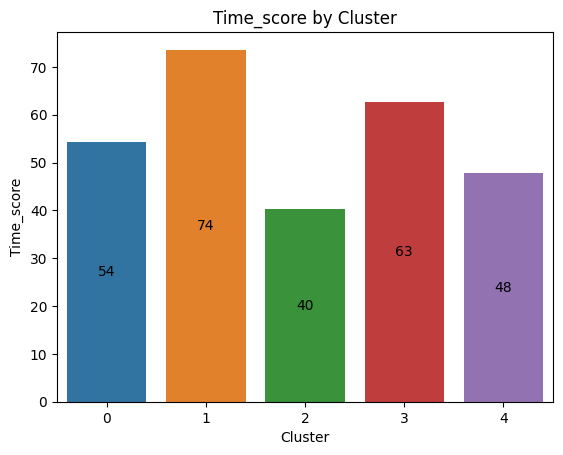

In [18]:
# 각 Cluster별 평균 Time_score를 시각화하기
ax = sns.barplot(data=temp_var, x='Cluster', y='Time_score')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Time_score by Cluster')
plt.show

In [20]:
# customer_data의 Time_score, PK, BOSS, Gacha, Attack, Mining의 열값을 골라내고 상관관계 분석하기
corr_data = customer_data[['Time_score', 'PK', 'BOSS', 'Gacha', 'Attack', 'Mining']].corr().round(2)
corr_data

,Time_score,PK,BOSS,Gacha,Attack,Mining
Time_score,1.00,0.32,0.06,-0.08,0.08,0.63
PK,0.32,1.00,0.65,0.05,-0.14,0.24
BOSS,0.06,0.65,1.00,-0.17,0.02,-0.08
Gacha,-0.08,0.05,-0.17,1.00,-0.69,-0.05
Attack,0.08,-0.14,0.02,-0.69,1.00,0.06
Mining,0.63,0.24,-0.08,-0.05,0.06,1.00


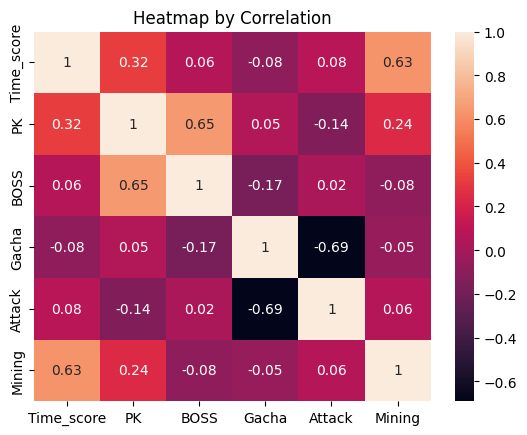

In [21]:
# 상관관계분석 결과 히트맵으로 시각화하기
sns.heatmap(data = corr_data, annot=True)
plt.title('Heatmap by Correlation')
plt.show()

In [22]:
# customer_data의 Cluster를 기준으로 PK, BOSS, Gacha, Attack, Mining의 평균값 집계
temp_var = customer_data.groupby('Cluster').agg({'PK':'mean', 'BOSS':'mean', 'Gacha':'mean', 'Attack':'mean', 'Mining':'mean'}).round(1)
temp_var

,PK,BOSS,Gacha,Attack,Mining
Cluster,,,,,
0,36.5,56.9,53.9,40.7,44.3
1,54.7,59.1,49.0,45.4,70.9
2,36.1,56.8,53.8,40.6,44.3
3,36.6,56.8,54.5,40.2,44.1
4,36.6,56.8,54.0,40.6,44.4


In [25]:
# 집계결과 시각화를 위한 전처리
temp_var.index = temp_var.index.tolist()
temp_var = temp_var.reset_index(drop=True)
temp_var

,Cluster,PK,BOSS,Gacha,Attack,Mining
0,0,36.5,56.9,53.9,40.7,44.3
1,1,54.7,59.1,49.0,45.4,70.9
2,2,36.1,56.8,53.8,40.6,44.3
3,3,36.6,56.8,54.5,40.2,44.1
4,4,36.6,56.8,54.0,40.6,44.4


In [27]:
temp_var1 = temp_var.drop([temp_var.columns[0]], axis=1)
temp_var1

,PK,BOSS,Gacha,Attack,Mining
0,36.5,56.9,53.9,40.7,44.3
1,54.7,59.1,49.0,45.4,70.9
2,36.1,56.8,53.8,40.6,44.3
3,36.6,56.8,54.5,40.2,44.1
4,36.6,56.8,54.0,40.6,44.4


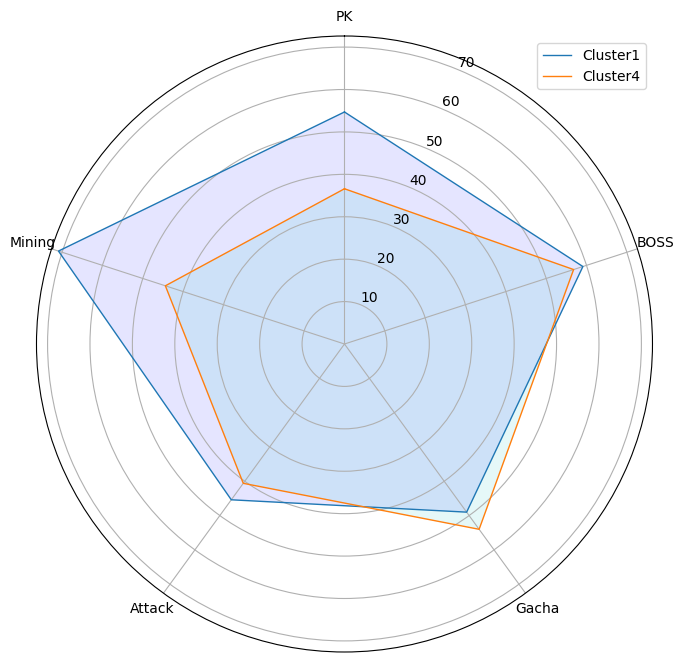

In [32]:
# Radar Chart를 이용한 집계결과 시각화
from math import pi

# Radar Chart의 각 방향 개수 정의
categories=list(temp_var1)
N = len(categories)

# 방향변수 개수에 따른 레이더 차트 각(angle) 정의
angles = [n / float(N)*2*pi for n in range(N)]
angles += angles[:1]

# 초기 레이더 차트 생성
plt.figure(figsize=(8,8)) # 차트 크기
ax = plt.subplot(111, polar=True) # sub 차트 생성

# 12시 방향을 기준으로 차트 생성
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1) # 시계방향 : -1 / 반시계방향 : 1

# 레이더차트에 Cluster1 표기
values = temp_var1.loc[1].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster1')
ax.fill(angles, values, 'b', alpha=0.1)

# 레이더차트에 Cluster4 표기
values = temp_var1.loc[4].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster4')
ax.fill(angles, values, 'c', alpha=0.1)

# 각 변수 이름 부여
plt.xticks(angles[:-1], categories)
plt.legend()
plt.show()

## 3. 전략 수립 및 시행

1. Mine Ground의 경우 게임을 오랫동안 즐기는 1번 클러스터가 존재한다.
2. 다른 클러스터의 고객들은 상대적으로 게임을 오래즐기지 않고, 레벨이 낮은 편이다.
3. 1번 클러스터 고객들이 게임 안에서 보이는 행동패턴을 파악하고, 다른 클러스터 고객들이 쉽게 따라할 수 있도록 업데이트를 하자.
4. 이번 업데이트를 통해서 사람들이 게임에 더 쉽게 몰입하고, 오랫동안 게임을 즐길 수 있을 것이다.